# Lab | Customer Analysis Round 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 

In [3]:
from matplotlib.ticker import PercentFormatter

In [4]:
data = pd.read_csv('marketing_customer_analysis.csv')

#### Show DataFrame info & describe DataFrame.

In [5]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### Show a plot of the total number of responses.

<AxesSubplot:>

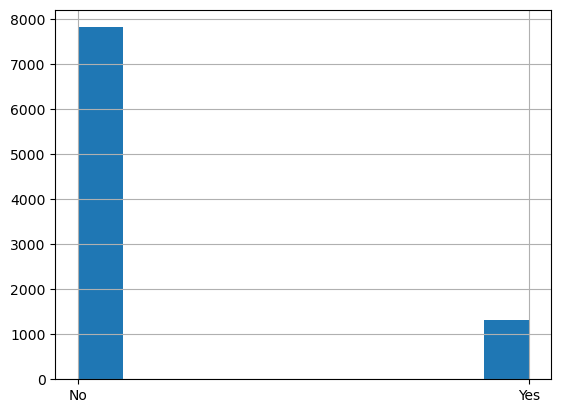

In [8]:
data['Response'].hist()

#### Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='Sales Channel', ylabel='count'>

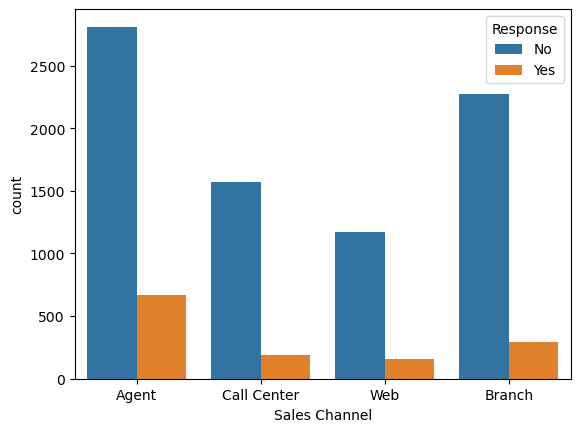

In [11]:
sns.countplot('Sales Channel', hue='Response', data=data)

In [9]:
data['Response'].value_counts(normalize=True)*100

No     85.679877
Yes    14.320123
Name: Response, dtype: float64

In [10]:
response_rate = data['Response'].value_counts(normalize=True).mul(100).astype(str)+'%'
response_rate

No      85.67987738121306%
Yes    14.320122618786948%
Name: Response, dtype: object

In [12]:
Response_rate_channel = data[["Sales Channel", "Response"]].value_counts().unstack()
Response_rate_channel

Response,No,Yes
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [39]:
Response_rate_channel = data[["Sales Channel", "Response"]].value_counts(normalize=True).mul(100).astype(str)+'%'
Response_rate_channel

Sales Channel  Response
Agent          No          30.775125903218743%
Branch         No          24.885044887234507%
Call Center    No          17.221370702868406%
Web            No          12.798335887891396%
Agent          Yes          7.291438581125466%
Branch         Yes          3.218743157433764%
Call Center    Yes          2.102036347711846%
Web            Yes         1.7079045325158748%
dtype: object

In [19]:
chart_response_sales_chanel2 = {'Sales Channel' : ['Agent', 'Branch', 'Call Center', 'Web'],
    'No': [30.77, 24.88,17.22,12.7],
        'Yes': [7.29,3.21,2.10,1.70]
        }
df2 = pd.DataFrame(chart_response_sales_chanel2)
df2.head()

,Sales Channel,No,Yes
0,Agent,30.77,7.29
1,Branch,24.88,3.21
2,Call Center,17.22,2.10
3,Web,12.70,1.70


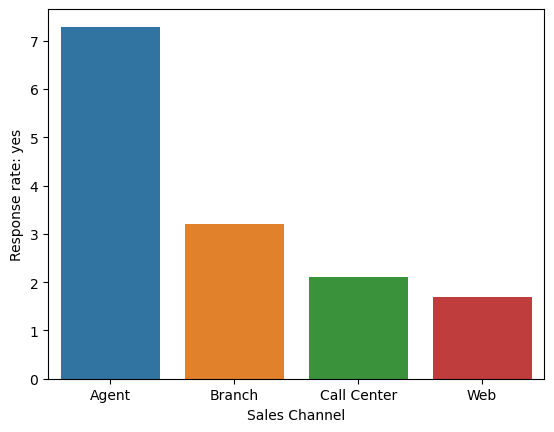

In [27]:
Ex_2 = sns.barplot(x="Sales Channel", y="Yes", data=df2)
plt.ylabel('Response rate: yes')
plt.show()

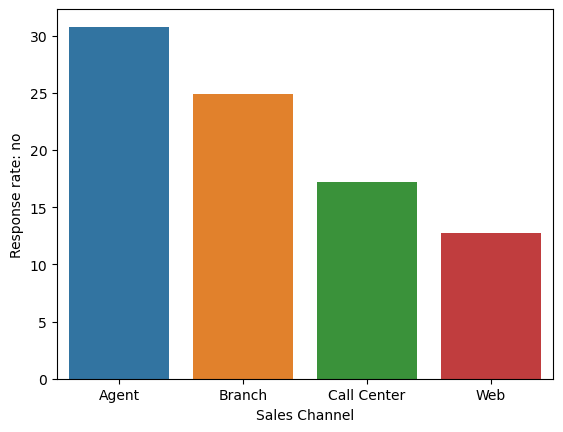

In [73]:
Ex_2_1 = sns.barplot(x="Sales Channel", y="No", data=df2)
plt.ylabel('Response rate: no')
plt.show()

#### Show a plot of the response rate by the total claim amount. 

In [35]:
#We know for data.describe() the max and min of Total Claim Amount, so lets label it
data['Amount Label'] = pd.cut(x=data['Total Claim Amount'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000],
                     labels=['>500', '>1000', '>1500','>2000', '>2500', '>3000'])
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Amount Label
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,>500
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,>1500
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,>1000
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,>1000
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,>500


<AxesSubplot:xlabel='Amount Label', ylabel='count'>

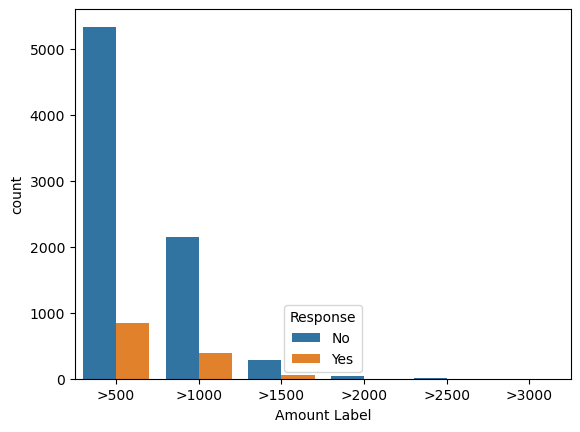

In [36]:
sns.countplot('Amount Label', hue='Response', data=data)

In [52]:
Response_rate_amount = data[["Amount Label", "Response"]].value_counts().unstack()
Response_rate_amount

Response,No,Yes
Amount Label,,
>500,5337.0,852.0
>1000,2146.0,396.0
>1500,277.0,60.0
>2000,47.0,NaN
>2500,16.0,NaN
>3000,3.0,NaN


In [54]:
Response_rate_amount = data[["Amount Label", "Response"]].value_counts(normalize=True).mul(100).astype(str)+'%'
Response_rate_amount

Amount Label  Response
>500          No             58.43004160280272%
>1000         No            23.494635428070943%
>500          Yes            9.327786292971316%
>1000         Yes            4.335449967155682%
>1500         No            3.0326253558134444%
              Yes           0.6568863586599518%
>2000         No            0.5145609809502956%
>2500         No           0.17516969564265383%
>3000         No          0.032844317932997594%
dtype: object

In [42]:
chart_response_amount_label = {'Amount Label' : ['>500', '>1000', '>1500','>2000', '>2500', '>3000'],
    'No': [58.43, 23.49, 3.03, 0.51, 0.17,  0.03],
        'Yes': [9.32,4.33,0.65, 0, 0, 0]
        }
df3 = pd.DataFrame(chart_response_amount_label)
df3

,Amount Label,No,Yes
0,>500,58.43,9.32
1,>1000,23.49,4.33
2,>1500,3.03,0.65
3,>2000,0.51,0.00
4,>2500,0.17,0.00
5,>3000,0.03,0.00


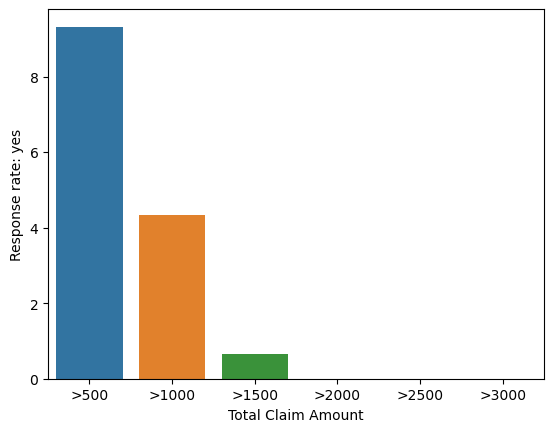

In [71]:
Ex_3 = sns.barplot(x="Amount Label", y="Yes", data=df3)
plt.ylabel('Response rate: yes')
plt.xlabel('Total Claim Amount')
plt.show()

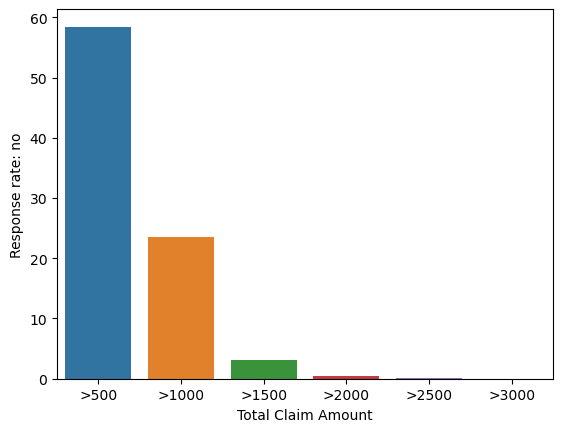

In [70]:
Ex_3_1 = sns.barplot(x="Amount Label", y="No", data=df3)
plt.ylabel('Response rate: no')
plt.xlabel('Total Claim Amount')
plt.show()

#### Show a plot of the response rate by income.

In [50]:
#Again, we know for data.describe() the max and min of Total Claim Amount, so lets label it
data['Income Label'] = pd.cut(x=data['Income'], bins=[-1, 0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000],
                     labels=['0', '>10.000', '>20.000', '>30.000', '>40.000', '>50.000', '>60.000', '>70.000', '>80.000', '>90.000', '>100.000'])
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Amount Label,Income Label
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,>500,>60.000
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,>1500,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,>1000,>50.000
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,>1000,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,>500,>50.000


<AxesSubplot:xlabel='Income Label', ylabel='count'>

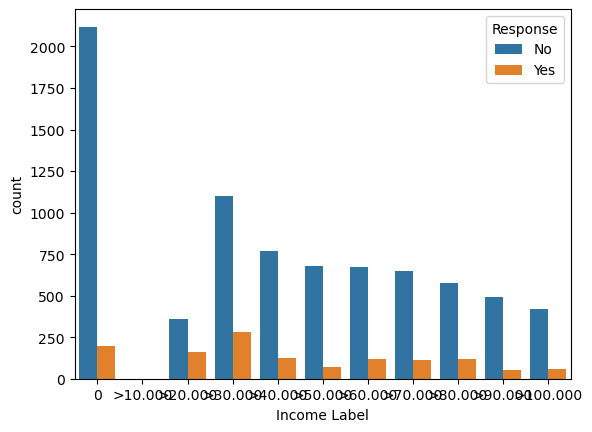

In [51]:
sns.countplot('Income Label', hue='Response', data=data)

In [56]:
Response_rate_income = data[["Income Label", "Response"]].value_counts(normalize=True).mul(100).astype(str)+'%'
Response_rate_income

Income Label  Response
0             No          23.199036566673968%
>30.000       No          12.031968469454785%
>40.000       No           8.397197284869717%
>50.000       No            7.41186774687979%
>60.000       No           7.346179111013795%
>70.000       No          7.0724764615721485%
>80.000       No           6.317057149113204%
>90.000       No           5.375520035033939%
>100.000      No           4.587256404641997%
>20.000       No          3.9413181519597105%
>30.000       Yes          3.087365885701774%
0             Yes          2.167724983577841%
>20.000       Yes           1.77359316838187%
>40.000       Yes         1.3794613531858988%
>60.000       Yes         1.3137727173199036%
>80.000       Yes         1.3137727173199036%
>70.000       Yes         1.2480840814539085%
>50.000       Yes         0.7882636303919422%
>100.000      Yes         0.6568863586599518%
>90.000       Yes         0.5911977227939567%
dtype: object

In [63]:
chart_response_income_label = {'Income Label' : ['0', '>10.000', '>20.000', '>30.000', '>40.000', '>50.000', '>60.000', '>70.000', '>80.000', '>90.000', '>100.000'],
    'No': [23.19, 0, 3.94, 12.03, 8.39, 7.41, 7.34, 7.07, 6.31, 5.37, 4.58],
        'Yes': [2.16,0, 1.77,3.08, 1.37, 0.78, 1.31,1.24, 1.31, 0.59, 0.65]
        }
df4 = pd.DataFrame(chart_response_income_label)
df4

,Income Label,No,Yes
0,0,23.19,2.16
1,>10.000,0.00,0.00
2,>20.000,3.94,1.77
3,>30.000,12.03,3.08
4,>40.000,8.39,1.37
5,>50.000,7.41,0.78
6,>60.000,7.34,1.31
7,>70.000,7.07,1.24
8,>80.000,6.31,1.31
9,>90.000,5.37,0.59


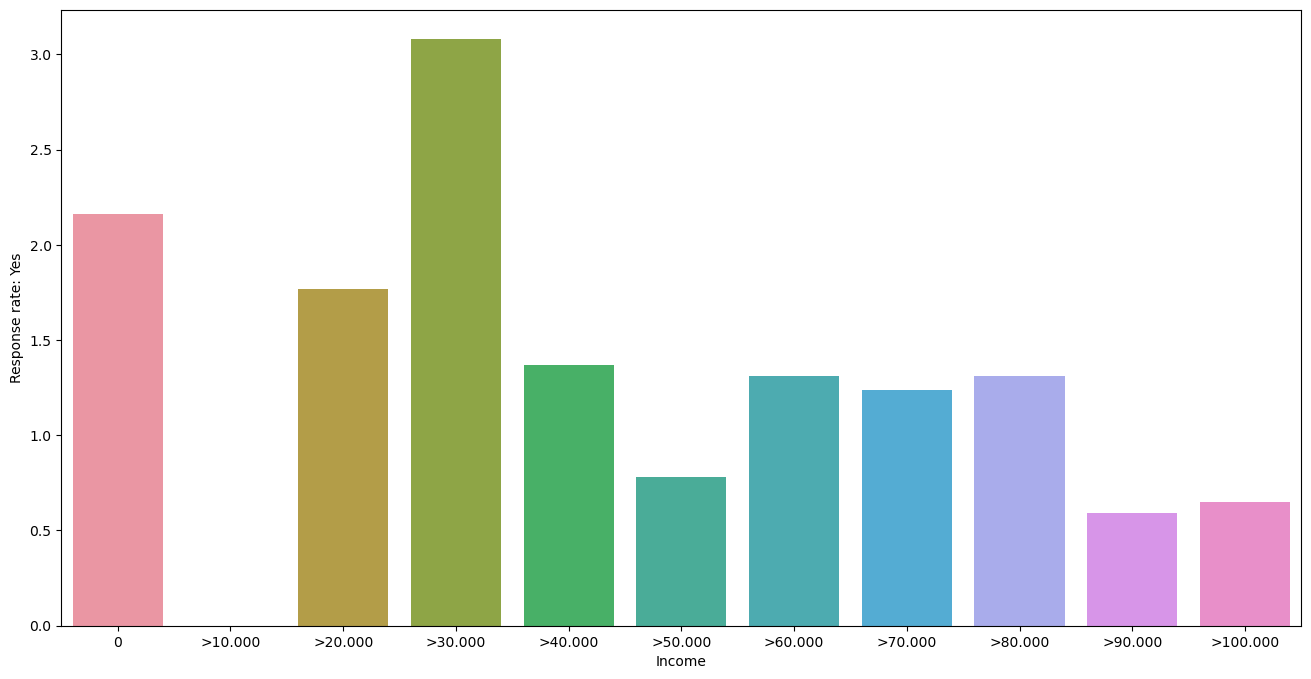

In [69]:
plt.figure(figsize=(16,8))

Ex_4 = sns.barplot(x="Income Label", y="Yes", data=df4)
plt.ylabel('Response rate: Yes')
plt.xlabel('Income')
plt.show()

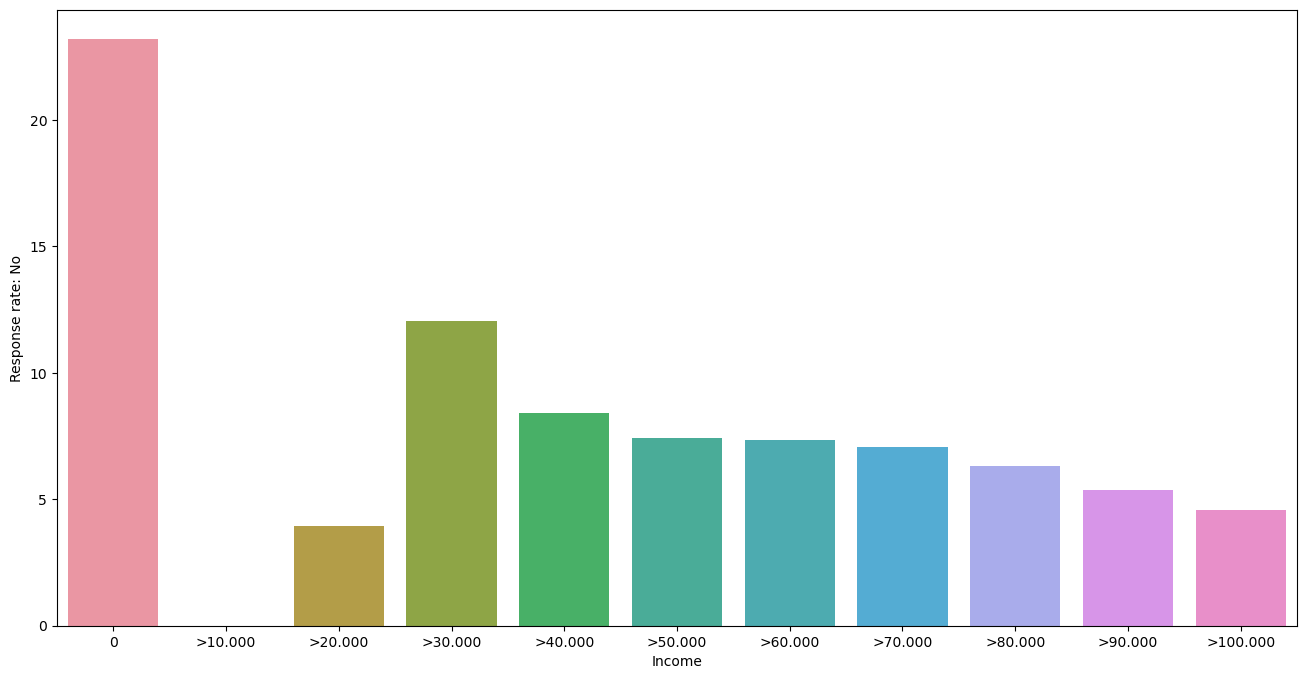

In [68]:
plt.figure(figsize=(16,8))
Ex_4_2 = sns.barplot(x="Income Label", y="No", data=df4)
plt.ylabel('Response rate: No')
plt.xlabel('Income')
plt.show()